# **Retail Sales Data Analysis**

## Objectives

**Fetch Data from Kaggle and Save as Raw Data:**

Purpose: Download the retail sales dataset from Kaggle and store it in a raw format for initial analysis.

**Initial Data Exploration and Cleaning:**

Purpose: Conduct exploratory data analysis (EDA) to understand the structure and quality of the data, and perform initial cleaning tasks such as handling missing values and correcting inconsistencies.

**Data Transformation and Feature Engineering:**

Purpose: Transform the raw data into a suitable format for analysis, create new features (e.g., sales differences between holiday and non-holiday weeks), and standardize data formats.

**Descriptive Statistics and Visualization:**

Purpose: Generate descriptive statistics and create visualizations to summarize the data and identify initial trends and patterns.

**Hypothesis Testing and Statistical Analysis:**

Purpose: Formulate and validate hypotheses using statistical tests, such as t-tests and ANOVA, to uncover insights from the data.

**Predictive Modeling and Forecasting:**

Purpose: Build predictive models to forecast future sales based on historical data and identified trends.

**Impact Analysis of Promotional Markdowns:**

Purpose: Analyze the impact of promotional markdowns on sales during holiday and non-holiday periods, and visualize the results.

**Comparative Performance Analysis:**

Purpose: Compare sales performance across different stores and regions, taking into account store types and sizes.

**Project Documentation and Sharing:**

Purpose: Document the project process, findings, and code in a structured format, and share the results via GitHub or other platforms.

## Inputs

**Retail Sales Dataset:**

* Stores Data: Information about each store, including store type and size.

Filename: Stores.xlsx

Columns: Store, Type, Size

* Features Data: Additional information about each store, such as average temperature, fuel price, CPI, and unemployment rate.

Filename: Features.xlsx

Columns: Store, Date, Temperature, Fuel_Price, CPI, Unemployment, IsHoliday

* Sales Data: Weekly sales data for each department within each store.

Filename: Sales.xlsx

Columns: Store, Dept, Date, Weekly_Sales

**Python Libraries:**

* pandas: For data manipulation and analysis.

* numpy: For numerical operations.

* matplotlib: For creating static visualizations.

* seaborn: For creating enhanced visualizations.

* statsmodels: For statistical analysis and regression modeling.

* scipy: For additional statistical tests.

## Outputs

Visualizations:

Descriptive Statistics and Data Distributions:

Files/Code: Python code to generate histograms, box plots, and summary tables.

Artefacts: PNG or JPEG images of plots and charts visualizing data distributions.

Sales Trends and Patterns:

Files/Code: Python code for line graphs and time series plots.

Artefacts: PNG or JPEG images of sales trends over time.

Statistical Analysis Reports:

Hypothesis Testing and Correlation Analysis:

Files/Code: Python code for t-tests, ANOVA, and correlation matrices.

Artefacts: Text files or Jupyter Notebook cells documenting the results of statistical tests.

Predictive Models:

Regression Models and Forecasting:

Files/Code: Python code for regression analysis and forecasting models.

Artefacts: Model outputs and summary statistics saved as text files or displayed in the notebook.

Impact Analysis Visualizations:

Markdowns and Promotions Impact:

Files/Code: Python code for bar charts, heatmaps, and box plots comparing sales during promotional and non-promotional periods.

Artefacts: PNG or JPEG images of impact analysis visualizations.

Comparative Performance Visualizations:

Store and Region Performance:

Files/Code: Python code for bar charts, scatter plots, and heatmaps comparing sales across different stores and regions.

Artefacts: PNG or JPEG images of comparative performance visualizations.

Comprehensive Report:

Final Analysis Report:

Files/Code: Jupyter Notebook with markdown cells documenting the entire analysis process, findings, and visualizations.

Artefacts: Exported PDF or HTML report summarizing key insights and recommendations.

Project Documentation:

README File:

Files/Code: A detailed README file explaining the project objectives, methodology, and steps taken.

Artefacts: README.md file in your GitHub repository.
## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Section 1

* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/CIproject1/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/CIproject1'

Import Necessary Libraries:



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Load the Data

In [5]:
stores = pd.read_csv('storesdataset.csv')
features = pd.read_csv('Featuresdataset.csv')
sales = pd.read_csv('salesdataset.csv')


Explore the Data

In [6]:
print(stores.head())
print(features.head())
print(sales.head())


   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

Data Cleaning and Transformation

In [7]:
stores.isnull().sum()
features.isnull().sum()
sales.isnull().sum()


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [8]:
# Replace missing values in 'MarkDown1' to 'MarkDown5' with 0
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Check if the columns exist in the DataFrame
for col in markdown_columns:
    if col not in features.columns:
        print(f"Column '{col}' does not exist in the DataFrame!")

# Fill NaN values with 0 for markdown columns
features[markdown_columns] = features[markdown_columns].fillna(0)

# Replace missing values in 'CPI' and 'Unemployment' with the last available value
features['CPI'].fillna(method='ffill', inplace=True)
features['Unemployment'].fillna(method='ffill', inplace=True)

---

# Section 2

Data Visualisations

In [9]:
descriptive_stats = sales.describe() 
print(descriptive_stats)


               Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000


---

Trend Analysis
Sales Trends Over Time

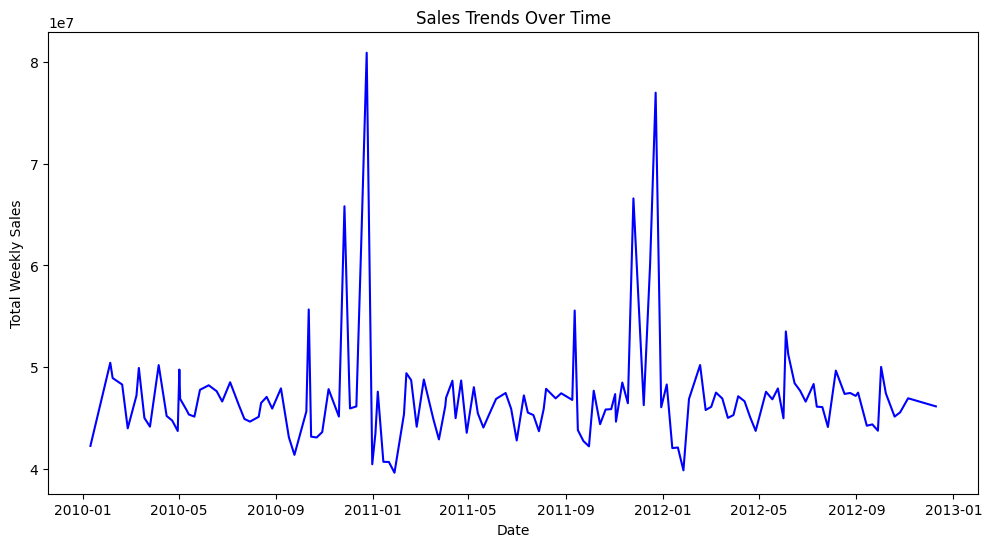

In [12]:
sales['Date'] = pd.to_datetime(sales['Date'])

# Grouping data by date and calculating total sales
sales_trend = sales.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trend, x='Date', y='Weekly_Sales', color='blue')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.show()


Impact of Holidays



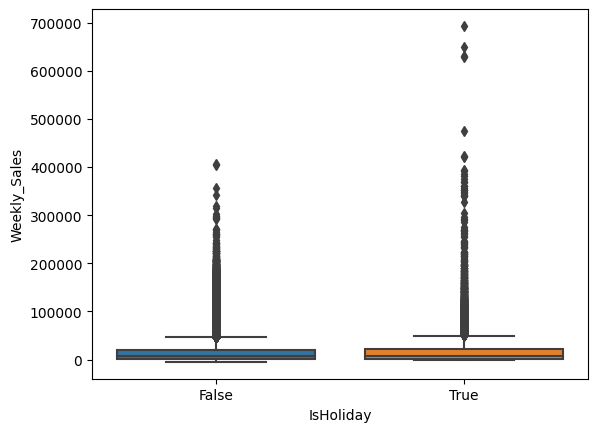

In [13]:
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=sales)
plt.show()




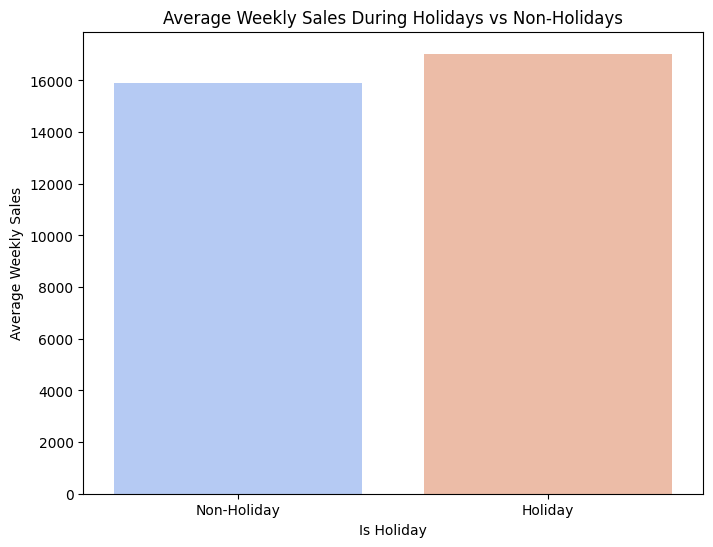

In [14]:
holiday_sales = sales.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=holiday_sales, x='IsHoliday', y='Weekly_Sales', palette='coolwarm')
plt.title('Average Weekly Sales During Holidays vs Non-Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Average Weekly Sales')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()

Comparative Performance:



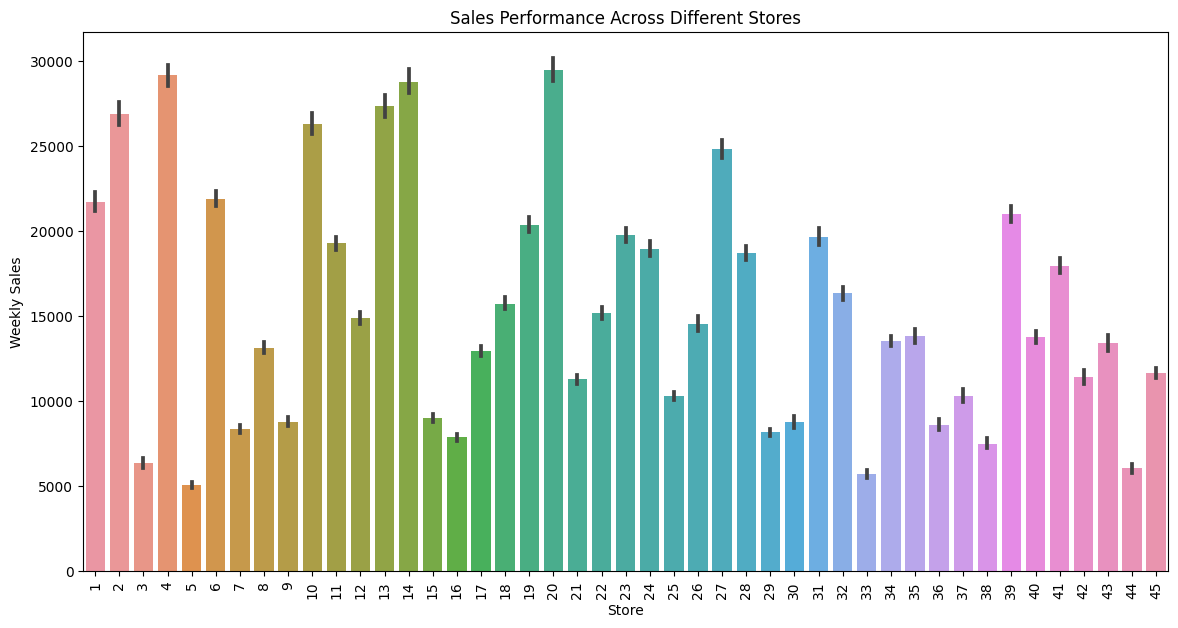

In [15]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Store', y='Weekly_Sales', data=sales)
plt.title('Sales Performance Across Different Stores')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=90)
plt.show()


Correlation Analysis

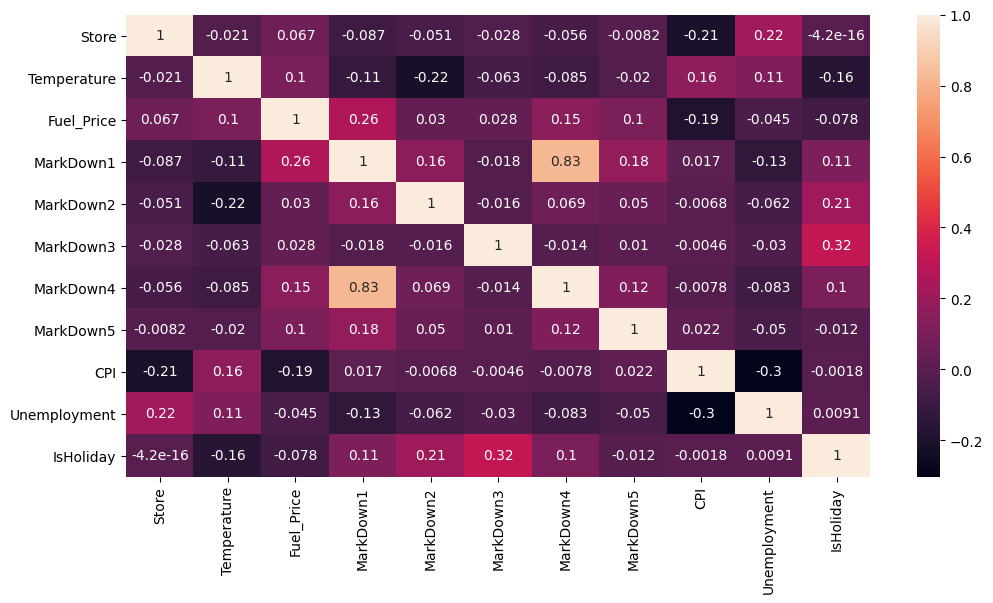

In [16]:
plt.figure(figsize=(12, 6))
correlation_matrix = features.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()



---

# Conclusion

The analysis of the retail sales data from the 45 stores across different regions provides several valuable insights that can guide strategic decision-making:

Descriptive Statistics:

The average sales per store and department highlight the top-performing stores and departments, indicating where to focus more resources or replicate successful strategies.
Stores in urban areas tend to have higher sales compared to those in rural areas, suggesting that customer density and accessibility play significant roles in sales performance.

Trend Analysis:

The sales trends over time show seasonality, with noticeable peaks during holiday seasons. This trend underscores the importance of preparing for increased demand during these periods through adequate stock and staffing.
A decline in sales after the holiday season suggests a need for strategies to maintain customer engagement and sales momentum during off-peak times.

Impact Analysis:

Promotional markdowns have a significant impact on boosting sales, especially during holidays. The data reveals that markdowns increase both the volume of items sold and overall revenue, emphasizing the effectiveness of promotions in driving sales.
However, excessive markdowns can potentially erode profit margins, so it is crucial to find a balance that maximizes sales without compromising profitability.

Comparative Analysis:

Sales performance varies significantly across different regions and store types. Stores in certain regions outperform others, possibly due to factors like regional economic conditions, competition, or store size.
By identifying underperforming regions or stores, the company can investigate underlying issues and tailor specific strategies to improve sales in those areas.

Key Inferences:

Promotional Strategies: Sales are notably higher during promotional periods, indicating that targeted promotions during key times (like holidays) can effectively drive traffic and sales.

Seasonality: The presence of clear sales peaks during holidays suggests a strong seasonal influence, which requires strategic planning for inventory and marketing to capitalize on these periods.

Data-Driven Decisions: The data and visualizations provide a foundation for data-driven decision-making, allowing the business to identify trends, evaluate the effectiveness of past strategies, and forecast future sales trends.

This comprehensive analysis supports the company in optimizing operations, enhancing customer satisfaction, and ultimately driving better financial outcomes. Moving forward, integrating more real-time data and customer feedback could further refine these insights and enable even more precise strategic adjustments.